In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#adding some code data feature engineering
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
import pandas as pd
import numpy as np

# Date and Time
from datetime import datetime

# Additional visualization (not direct equivalents, but useful)
from scipy.stats import gaussian_kde





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
members = pd.read_csv("/content/drive/MyDrive/DATA MINING /original big data /members_v3.csv")
print(members.head())

                                           msno  city  bd  gender  \
0  Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=     1   0     NaN   
1  +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=     1   0     NaN   
2  cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=     1   0     NaN   
3  9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=     1   0     NaN   
4  WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=     6  32  female   

   registered_via  registration_init_time  
0              11                20110911  
1               7                20110914  
2              11                20110915  
3              11                20110915  
4               9                20110915  


In [ ]:
members


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


In [ ]:
members.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [ ]:
members.isnull().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

Observation:

* Also , the column 'bd' is showing the 'age' but we can observe here that there are some unusual entries like negative entries , so we should put the filter on the min and max age.
* Seeing the data from its description , lets first convert the registration_init_time into date time format.
* City and registration_via are should be encoded.

Analysing Age column , handling unrealisting age range

In [ ]:

# Set unrealistic ages to None
min_age, max_age = 0, 100
members.loc[(members['bd'] < min_age) | (members['bd'] > max_age), 'bd'] = None


In [ ]:
print(members['bd'])

0           0.0
1           0.0
2           0.0
3           0.0
4          32.0
           ... 
6769468     0.0
6769469     0.0
6769470    26.0
6769471     0.0
6769472     0.0
Name: bd, Length: 6769473, dtype: float64


In [ ]:
members.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.763822e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.694093e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.511258e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,0.000000e+00,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,1.000000e+02,1.900000e+01,2.017043e+07


Analysing registration_init_time column

In [ ]:
# Convert date columns to datetime
members['registration_init_time'] = pd.to_datetime(members['registration_init_time'], format='%Y%m%d')


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0.0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0.0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0.0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0.0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32.0,female,9,2011-09-15


In [ ]:

members.describe(include=[np.number, 'category', 'datetime'])


<ipython-input-21-176da5629730>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  members.describe(include=[np.number, 'category', 'datetime'])


,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.763822e+06,6.769473e+06,6769473
unique,NaN,NaN,NaN,4782
top,NaN,NaN,NaN,2015-10-09 00:00:00
freq,NaN,NaN,NaN,12413
first,NaN,NaN,NaN,2004-03-26 00:00:00
last,NaN,NaN,NaN,2017-04-29 00:00:00
mean,3.847358e+00,9.694093e+00,5.253069e+00,NaN
std,5.478359e+00,1.511258e+01,2.361398e+00,NaN
min,1.000000e+00,0.000000e+00,-1.000000e+00,NaN
25%,1.000000e+00,0.000000e+00,4.000000e+00,NaN


In [ ]:
# Check for Null Values
null_count = members['registration_init_time'].isnull().sum()
print(f"Number of null values in 'registration_init_time': {null_count}")

# Inspect Unique Values
unique_values = members['registration_init_time'].unique()
print(f"Unique values sample in 'registration_init_time': {unique_values[:10]}")

# Range Check
date_min = members['registration_init_time'].min()
date_max = members['registration_init_time'].max()
print(f"Date range in 'registration_init_time': {date_min} to {date_max}")

# Type Check
all_dates = all(isinstance(x, pd.Timestamp) for x in members['registration_init_time'])
print(f"All entries are datetime objects: {all_dates}")


Number of null values in 'registration_init_time': 0
Unique values sample in 'registration_init_time': ['2011-09-11T00:00:00.000000000' '2011-09-14T00:00:00.000000000'
 '2011-09-15T00:00:00.000000000' '2011-09-16T00:00:00.000000000'
 '2011-09-17T00:00:00.000000000' '2011-09-18T00:00:00.000000000'
 '2011-09-19T00:00:00.000000000' '2011-09-20T00:00:00.000000000'
 '2011-09-22T00:00:00.000000000' '2011-09-23T00:00:00.000000000']
Date range in 'registration_init_time': 2004-03-26 00:00:00 to 2017-04-29 00:00:00
All entries are datetime objects: True


encoding the coliumn city and registration via

In [ ]:
# Analyze the distribution of values
print("City value counts:\n", members['city'].value_counts())
print("\nRegistered_via value counts:\n", members['registered_via'].value_counts())

City value counts:
 1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64

Registered_via value counts:
  4     2793213
 3     1643208
 9     1482863
 7      805895
 11      25047
 13       5455
 8        3982
 5        3115
 17       1494
 2        1452
 6        1213
 19        974
 16        888
 14        615
 1          43
 10         10
 18          5
-1           1
Name: registered_via, dtype: int64


these columns seems to be nominal , lets apply one hot encoding

In [ ]:

# Apply one-hot encoding
members_encoded = pd.get_dummies(members, columns=['city', 'registered_via'])

# Display the first few rows of the modified DataFrame
print(members_encoded.head())


                                           msno    bd  gender  \
0  Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=   0.0     NaN   
1  +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=   0.0     NaN   
2  cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=   0.0     NaN   
3  9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=   0.0     NaN   
4  WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=  32.0  female   

  registration_init_time  city_1  city_3  city_4  city_5  city_6  city_7  ...  \
0             2011-09-11       1       0       0       0       0       0  ...   
1             2011-09-14       1       0       0       0       0       0  ...   
2             2011-09-15       1       0       0       0       0       0  ...   
3             2011-09-15       1       0       0       0       0       0  ...   
4             2011-09-15       0       0       0       0       1       0  ...   

   registered_via_8  registered_via_9  registered_via_10  registered_via_11  \
0                 0                 0      

In [ ]:
print(members["bd"].describe())
members.bd.value_counts()

count    6.763822e+06
mean     9.694093e+00
std      1.511258e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.100000e+01
max      1.000000e+02
Name: bd, dtype: float64


0.0     4540215
22.0     112200
21.0     110574
20.0     110452
27.0     102769
         ...   
10.0         97
9.0          81
1.0          67
3.0          53
2.0          37
Name: bd, Length: 101, dtype: int64

Handling 'gender' column

In [ ]:
print(f'{(members["gender"].isna().sum() / len(members["gender"])):.2%} of users did not specify their gender')

65.43% of users did not specify their gender


In [ ]:
"""should we apply one hot encoding , in the github they have used it ,
or should we simply drop or replace it with -1 , this is what we used initially
for now keeping as is

In [ ]:
members.head()


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0.0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0.0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0.0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0.0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32.0,female,9,2011-09-15


analyse the transaction.csv file

In [ ]:
transac = pd.read_csv('/content/drive/MyDrive/DATA MINING /transactions.csv')


In [ ]:
transac.head()


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,20160822,20160922,0
1,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,20161022,20161122,0
2,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,20161222,20170122,0
3,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,20170222,20170322,0
4,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,20160322,20160422,0


In [ ]:
transac.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79914 entries, 0 to 79913
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    79914 non-null  object
 1   payment_method_id       79914 non-null  int64 
 2   payment_plan_days       79914 non-null  int64 
 3   plan_list_price         79914 non-null  int64 
 4   actual_amount_paid      79914 non-null  int64 
 5   is_auto_renew           79914 non-null  int64 
 6   transaction_date        79914 non-null  int64 
 7   membership_expire_date  79914 non-null  int64 
 8   is_cancel               79914 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 5.5+ MB


In [ ]:
#changing the transaction_date into date time format as we did in the previous members.csv file

In [ ]:
transac["transaction_date"] = pd.to_datetime(transac.transaction_date, format='%Y%m%d')


In [ ]:
transac.head()



,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,2016-08-22,2016-09-22,0
1,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,2016-10-22,2016-11-22,0
2,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,2016-12-22,2017-01-22,0
3,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,2017-02-22,2017-03-22,0
4,pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=,41,30,99,99,1,2016-03-22,2016-04-22,0


       payment_method_id  payment_plan_days  plan_list_price  \
count       79914.000000       79914.000000     79914.000000   
mean           39.244288          29.660172       131.007934   
std             3.218735          15.576776        70.282899   
min             3.000000           0.000000         0.000000   
25%            39.000000          30.000000        99.000000   
50%            41.000000          30.000000       149.000000   
75%            41.000000          30.000000       149.000000   
max            41.000000         450.000000      1788.000000   

       actual_amount_paid  is_auto_renew  transaction_date  \
count        79914.000000   79914.000000      7.991400e+04   
mean           135.462372       0.921666      2.015857e+07   
std             66.776366       0.268698      6.166227e+03   
min              0.000000       0.000000      2.015010e+07   
25%             99.000000       1.000000      2.015103e+07   
50%            149.000000       1.000000      2.016

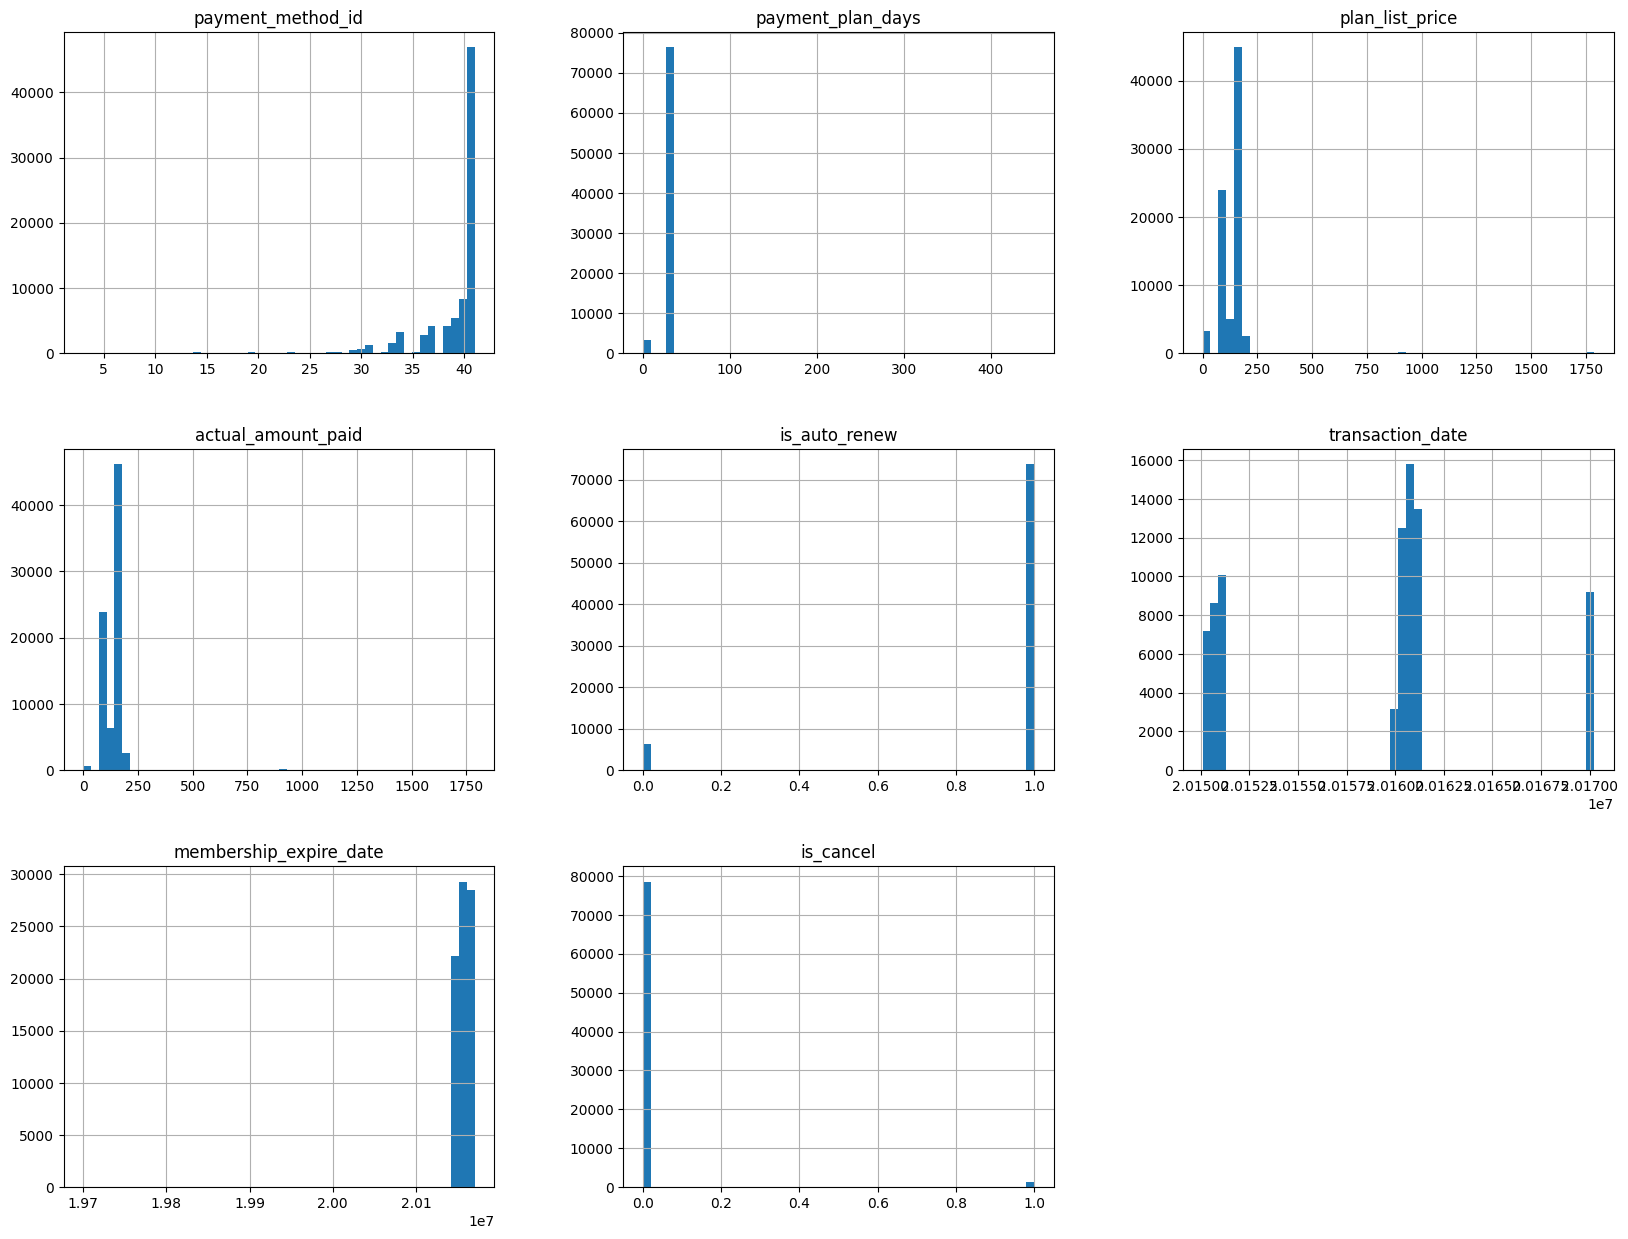

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(transac.describe())

# Histograms for numeric columns
transac.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:

# Convert 'transaction_date' and 'membership_expire_date' to datetime
transac['transaction_date'] = pd.to_datetime(transac['transaction_date'], format='%Y%m%d')
transac['membership_expire_date'] = pd.to_datetime(transac['membership_expire_date'], format='%Y%m%d')

# Descriptive statistics for numeric columns
print("Descriptive Statistics:\n", transac.describe())

# Analyzing the distribution of categorical columns
print("\nPayment Method Distribution:\n", transac['payment_method_id'].value_counts())
print("\nAuto Renew Distribution:\n", transac['is_auto_renew'].value_counts())
print("\nCancel Distribution:\n", transac['is_cancel'].value_counts())



# Saving the modified DataFrame, if needed
# transactions_df.to_csv('path_to/modified_transactions.csv', index=False)


Descriptive Statistics:
        payment_method_id  payment_plan_days  plan_list_price  \
count       79914.000000       79914.000000     79914.000000   
mean           39.244288          29.660172       131.007934   
std             3.218735          15.576776        70.282899   
min             3.000000           0.000000         0.000000   
25%            39.000000          30.000000        99.000000   
50%            41.000000          30.000000       149.000000   
75%            41.000000          30.000000       149.000000   
max            41.000000         450.000000      1788.000000   

       actual_amount_paid  is_auto_renew     is_cancel  
count        79914.000000   79914.000000  79914.000000  
mean           135.462372       0.921666      0.016956  
std             66.776366       0.268698      0.129106  
min              0.000000       0.000000      0.000000  
25%             99.000000       1.000000      0.000000  
50%            149.000000       1.000000      0.000000  

array([[<Axes: xlabel='plan_list_price', ylabel='plan_list_price'>,
        <Axes: xlabel='actual_amount_paid', ylabel='plan_list_price'>],
       [<Axes: xlabel='plan_list_price', ylabel='actual_amount_paid'>,
        <Axes: xlabel='actual_amount_paid', ylabel='actual_amount_paid'>]],
      dtype=object)

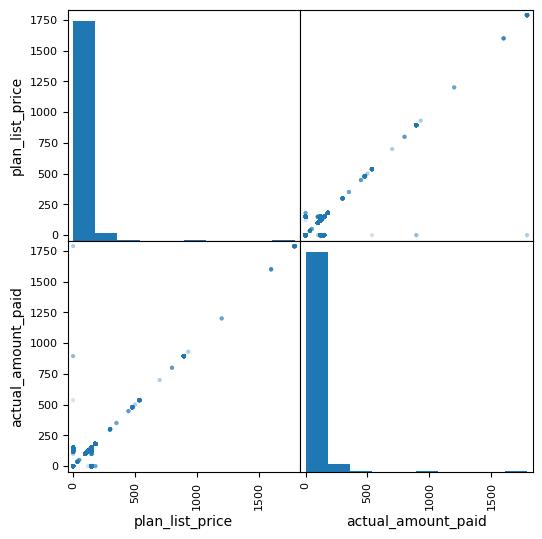

In [ ]:
# Exploring relationships - for example, comparing 'plan_list_price' and 'actual_amount_paid'
pd.plotting.scatter_matrix(transac[['plan_list_price', 'actual_amount_paid']], alpha=0.2, figsize=(6, 6))


<Axes: title={'center': 'Transactions Over Time'}, xlabel='transaction_date'>

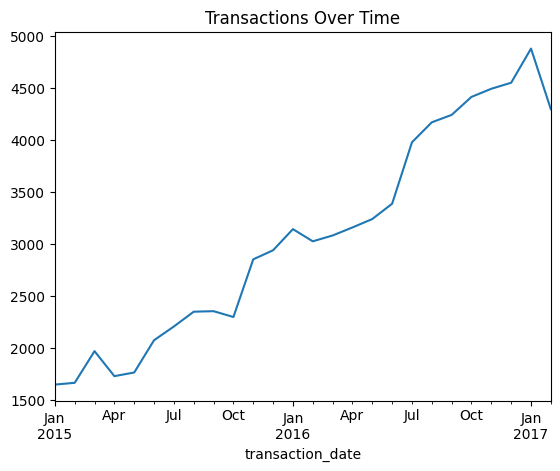

In [ ]:

# Exploring trends over time
transac.groupby(transac['transaction_date'].dt.to_period('M')).size().plot(kind='line', title='Transactions Over Time')

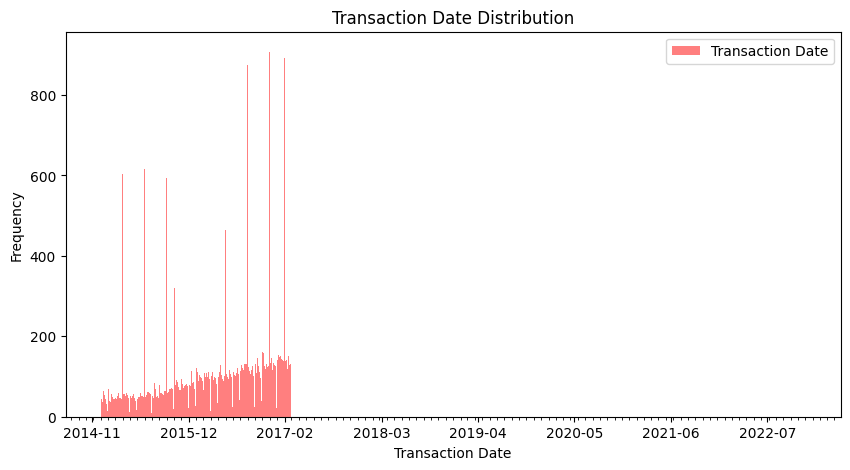

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

# Assuming you have a DataFrame named 'trans' with a 'transaction_date' column

# Filter the data for transactions after January 1, 2015
trans_filtered = transac[transac['transaction_date'] > '2015-01-01']

# Create a frequency plot for 'transaction_date'
plt.figure(figsize=(10, 5))
plt.hist(trans_filtered['transaction_date'], bins=pd.date_range(start='2015-01-01', end='2023-01-01', freq='1D'), color='red', alpha=0.5, label='Transaction Date')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.title('Transaction Date Distribution')
plt.legend(loc='upper right')
# Set the x-axis to show every year and month
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend(loc='upper right')
plt.show()


In [ ]:
unique_transactions_user_count = transac["msno"].nunique()
print(f"Unique users in transaction database: {unique_transactions_user_count:,}")

Unique users in transaction database: 4,964


In [ ]:
member_transactions = transactions.merge(members, on="msno", how="inner")


analyse the user_log file

In [ ]:
#adding some code data feature engineering
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
import pandas as pd
import numpy as np

# Date and Time
from datetime import datetime

from scipy.stats import gaussian_kde


In [ ]:
logs = pd.read_csv('/content/drive/MyDrive/DATA MINING /user_logs.csv',nrows=700000)

In [ ]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   msno        700000 non-null  object 
 1   date        700000 non-null  int64  
 2   num_25      700000 non-null  int64  
 3   num_50      700000 non-null  int64  
 4   num_75      700000 non-null  int64  
 5   num_985     700000 non-null  int64  
 6   num_100     700000 non-null  int64  
 7   num_unq     700000 non-null  int64  
 8   total_secs  700000 non-null  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 48.1+ MB


In [ ]:
logs.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,7.000000e+05,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,2.017032e+07,6.183810,1.507269,0.940189,1.080017,30.348624,29.083660,7920.078717
std,8.915605e+00,13.032741,3.932472,1.894615,3.631824,39.874425,32.077719,9646.898320
min,2.017030e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.023000
25%,2.017031e+07,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,1964.151750
50%,2.017032e+07,2.000000,1.000000,0.000000,0.000000,17.000000,19.000000,4598.761000
75%,2.017032e+07,7.000000,2.000000,1.000000,1.000000,37.000000,38.000000,9871.036750
max,2.017033e+07,2101.000000,558.000000,178.000000,957.000000,1819.000000,877.000000,451700.899000


converting the date column into date time format
try to see the

In [ ]:
logs['date'] = pd.to_datetime(logs['date'], format='%Y%m%d')


In [ ]:
logs[['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']].describe()


,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,6.183810,1.507269,0.940189,1.080017,30.348624,29.083660,7920.078717
std,13.032741,3.932472,1.894615,3.631824,39.874425,32.077719,9646.898320
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.023000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,1964.151750
50%,2.000000,1.000000,0.000000,0.000000,17.000000,19.000000,4598.761000
75%,7.000000,2.000000,1.000000,1.000000,37.000000,38.000000,9871.036750
max,2101.000000,558.000000,178.000000,957.000000,1819.000000,877.000000,451700.899000


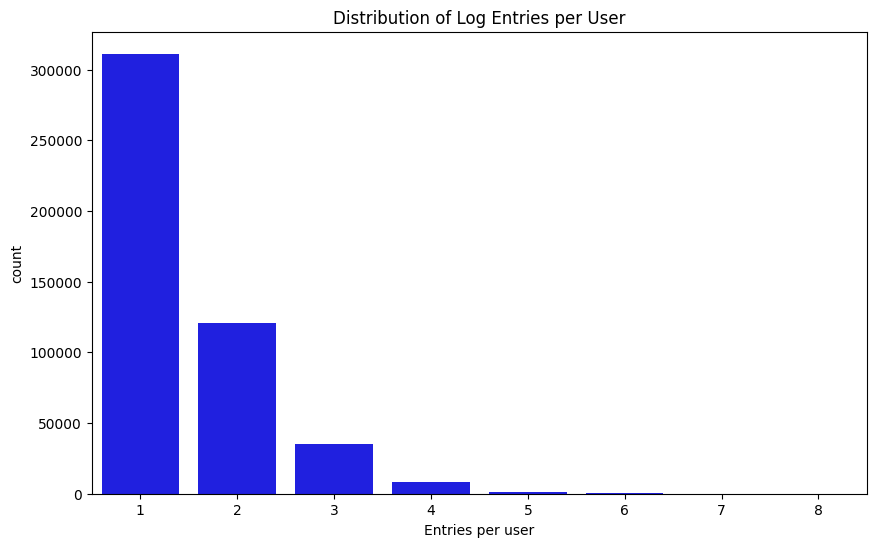

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Entries per user
p1_data = logs['msno'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x=p1_data, color='blue')
plt.xlabel('Entries per user')
plt.title('Distribution of Log Entries per User')
plt.show()





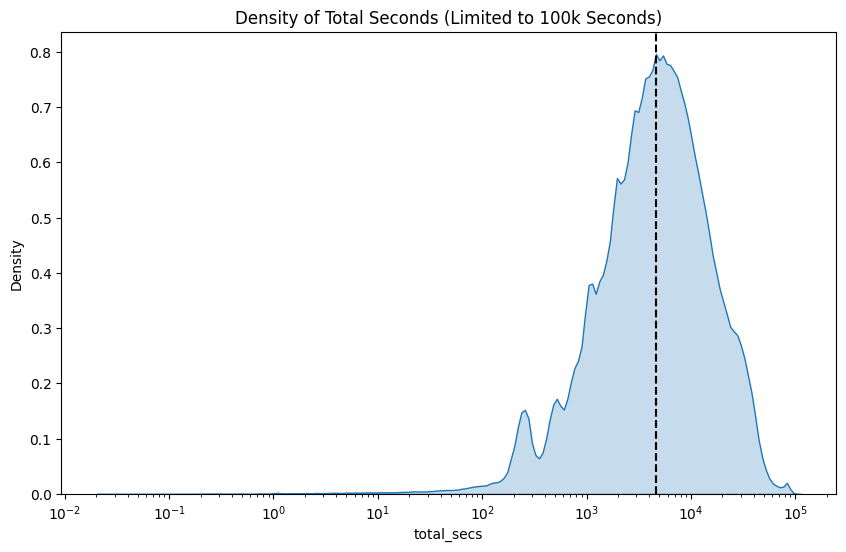

In [ ]:

logs_filtered = logs[abs(logs['total_secs']) < 1e5]
plt.figure(figsize=(10, 6))
sns.kdeplot(data=logs_filtered, x='total_secs', fill=True, bw_adjust=0.5, log_scale=True)
plt.axvline(x=logs['total_secs'].median(), color='k', linestyle='--')
plt.title('Density of Total Seconds (Limited to 100k Seconds)')
plt.show()

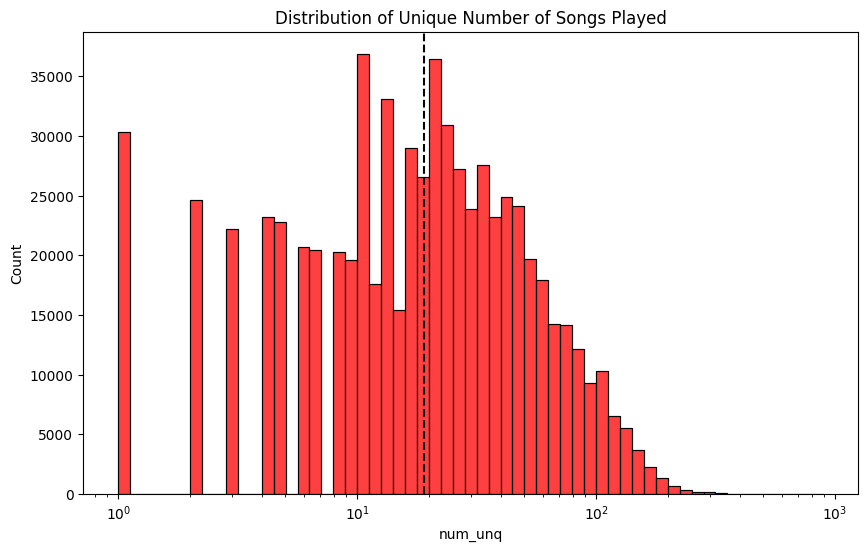

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=logs, x='num_unq', binwidth=0.05, color='red', log_scale=True)
plt.axvline(x=logs['num_unq'].median(), color='k', linestyle='--')
plt.title('Distribution of Unique Number of Songs Played')
plt.show()

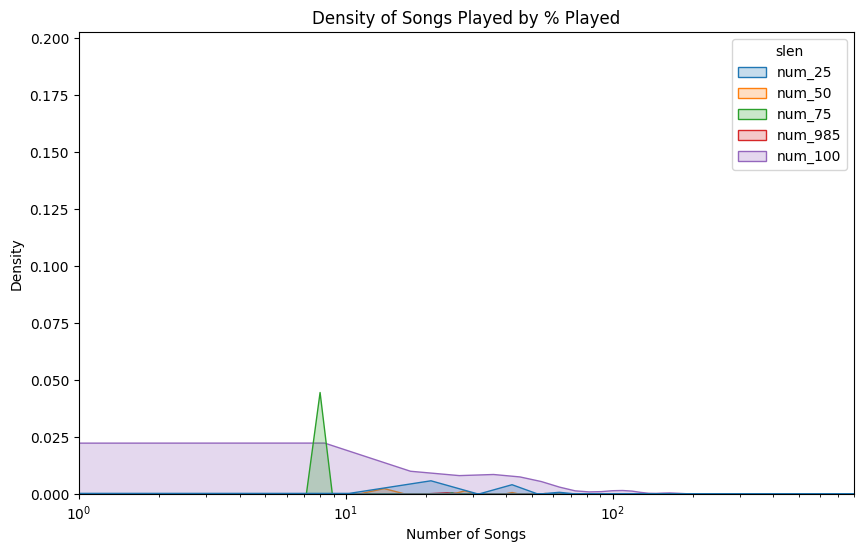

In [ ]:
melted_logs = pd.melt(logs, id_vars=['msno'], value_vars=['num_25', 'num_50', 'num_75', 'num_985', 'num_100'], var_name='slen', value_name='cases')
plt.figure(figsize=(10, 6))
sns.kdeplot(data=melted_logs, x='cases', hue='slen', common_norm=False, fill=True, bw_adjust=0.1)
plt.xscale('log')
plt.xlim(1, 800)
plt.xlabel('Number of Songs')
plt.title('Density of Songs Played by % Played')
plt.show()


In [ ]:
churn = pd.read_csv("/content/drive/MyDrive/DATA MINING /original big data /train.csv")
#churn.rename({"msno": "user_id"}, axis=1, inplace=True)
#churn["is_churn"] = churn.is_churn.astype(np.uint8)
churn.head(10)


,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1
5,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1
6,kVmM8X4iBPCOfK/m1l3KR7LjFoxD1EcKYCc76F5IAWw=,1
7,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1
8,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1
9,otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=,1


In [ ]:
churn.tail(10)

,msno,is_churn
970950,dusKsElluiYEfgyc8MPKbyH7MsY6cH9RXqZD3WmxJ7U=,0
970951,YAm2MZo94+P66Vi7QQai49CZ1MJQrIt96LtXckRg9Co=,0
970952,5NE9tsGhg7HbFNMdPT+3tytaIKG5013bBQG2vQTe+OI=,0
970953,eZ3y0lsY2SVZc2h8T3zB454TuBz6oVDMlFsEpEPQclQ=,0
970954,/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=,0
970955,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0
970956,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0
970957,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0
970958,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0
970959,oECkzJik4wKsbOEVY6UACLbmgM8qymFdb5cJaHrodY8=,0
